# LangGraph Tool


- LangGraph에서 지원하는 전체 Tool 목록 : https://python.langchain.com/docs/integrations/tools/
- Python REPL : https://python.langchain.com/docs/integrations/tools/python/
- Dall-E Image Generator : https://python.langchain.com/docs/integrations/tools/dalle_image_generator/
- YouTube : https://python.langchain.com/docs/integrations/tools/youtube/



In [2]:
%pip install langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core duckduckgo-search langchain-community chromadb opencv-python scikit-image youtube_search


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



## Python REPL

> 파이썬 코드실행 인터페이스

In [4]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
python_repl.run("print(1+1)")

'2\n'

In [6]:
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [7]:
repl_tool.invoke("print(1+4)")

'5\n'

In [8]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

In [12]:
from langchain import hub
llm_with_tools = llm.bind_tools(tools)
# Fetches the latest version of this prompt
prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")
prompt.pretty_print()
tools = [repl_tool]



================================ System Message ================================

You are a helpful assistant.

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [13]:
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser



runnable_agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

agent_executor = AgentExecutor(
    agent=runnable_agent, tools=tools, handle_parsing_errors=True
)

/Users/r00360/.pyenv/versions/llm-app/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/r00360/.pyenv/versions/llm-app/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/r00360/.pyenv/versions/llm-app/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/r00360/.pyenv/versions/llm-app/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/r00360/.pyenv/versions/llm-app/lib/python3.10/site-packages/IPython/core/pylabtools.py:1

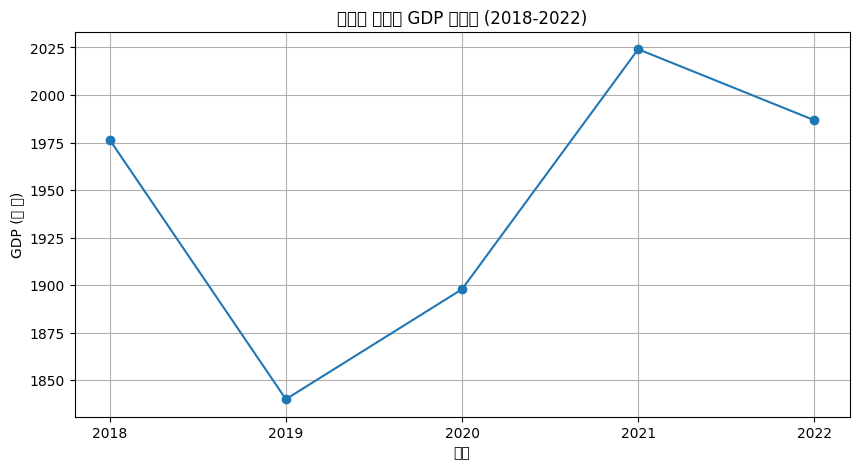

{'input': '한국의 5년치 GDP에 대한 가상의 데이터를 만들고 이를 시각화해줘',
 'output': '가상의 한국 GDP 데이터(2018-2022)를 생성하고 시각화한 결과입니다. 각 연도에 대한 GDP 값이 그래프로 표시되어 있습니다. \n\n- **2018년**: 약 1800억 원\n- **2019년**: 약 1700억 원\n- **2020년**: 약 1900억 원\n- **2021년**: 약 1850억 원\n- **2022년**: 약 1750억 원\n\n이 데이터는 무작위로 생성된 값이므로 실제 GDP와는 차이가 있을 수 있습니다.'}

In [14]:
results = agent_executor.invoke({"input":"한국의 5년치 GDP에 대한 가상의 데이터를 만들고 이를 시각화해줘"})
results